<a href="https://colab.research.google.com/github/sitbayevalibek/Portfolio-Projects/blob/main/air_ticket_price_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [2]:
sample_solution = pd.read_csv('https://raw.githubusercontent.com/sitbayevalibek/avia-chipta-dataset/main/sample_solution.csv')
test = pd.read_csv('https://raw.githubusercontent.com/sitbayevalibek/avia-chipta-dataset/main/test_data.csv', index_col=0)
train = pd.read_csv('https://raw.githubusercontent.com/sitbayevalibek/avia-chipta-dataset/main/train_data.csv', index_col=0)

In [3]:
test

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,,
1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35
...,...,...,...,...,...,...,...,...,...,...
4996,Air_India,AI-768,Kolkata,Afternoon,one,Morning,Bangalore,Business,17.42,15
4997,Indigo,6E-6214,Kolkata,Morning,zero,Afternoon,Mumbai,Economy,3.00,40
4998,Air_India,AI-402,Kolkata,Morning,one,Night,Mumbai,Business,11.17,37


In [4]:
train

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...
19996,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19997,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19998,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822


In [5]:
train.info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [6]:
train['airline'].unique()

array(['Vistara', 'SpiceJet', 'Indigo', 'Air_India', 'GO_FIRST',
       'AirAsia'], dtype=object)

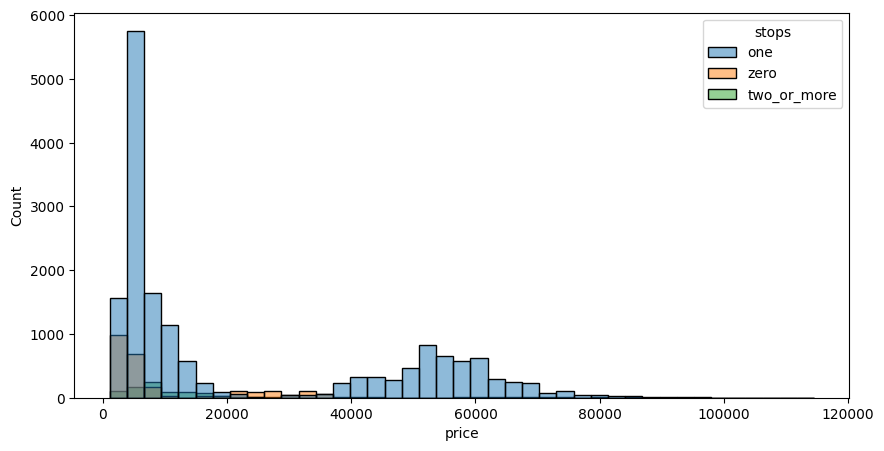

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(data=train, x='price', hue='stops')
plt.show()

In [8]:
train = train[train['price']<80000] #filtr

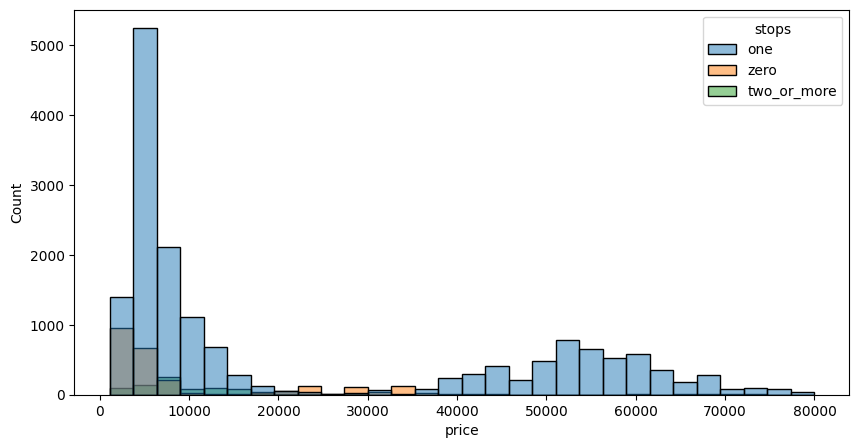

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(data=train, x='price', hue='stops')
plt.show()

In [10]:
num_attribs=['duration', 'days_left']
cat_attribs=['airline', 'flight', 'source_city', 'departure_time', 'stops', 'class', 'arrival_time', 'destination_city']

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

In [11]:
X_train=train.drop('price', axis=1)
y=train['price']

train_set, test_set=train_test_split(train, test_size=0.2, random_state=42)

In [14]:
X_prep = full_pipeline.fit_transform(X_train)

In [15]:
X_test=test_set.drop('price', axis=1)
y_test=test_set['price'].copy()

In [16]:
X_test_prep = full_pipeline.transform(X_test)

In [17]:
RF_model = RandomForestRegressor()
RF_model.fit(X_prep, y)

RandomForestRegressor()

In [19]:
y_predicted = RF_model.predict(X_test_prep)

lin_mse=mean_squared_error(y_test, y_predicted)
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)

1031.8352338000684


In [20]:
test_prep = full_pipeline.transform(test)
test_predict = RF_model.predict(test_prep)

In [21]:
sample_solution['price']=test_predict

In [23]:
sample_solution.to_csv('submission_avia.csv', index=False)